# Data Analysis for Data Project
## LittleSapling Toys
Fall 2018

From a hobby to a career, LittleSaplingToys has become the center of the Christensen's lives. Starting in 2008 as the first modern wooden toys on Etsy, they soon became the biggest toy sellers on that platform and continued to expand as they shipped their homemade, natural, wooden toys around the world with a promise to plant a tree for every toy sold. 

The goal of this project is to provide digestable, actionable information for the Christensens on their business. The data was not always tracked or monitored as their business was never meant to become what it now is, so this is also an opportunity to view the trail they've blazed along this journey.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import statistics
import geopandas
from reading_cleaning import *
import datetime

plt.rcParams["figure.dpi"] = 100

# Data Sources
The data files used have been collected from LittleSaplingToys' Zipbooks and Shipstation accounts. Zipbooks is an online software that primarily tracks their income and expenses. They work with their finances primarily through that avenue. Shipstation is their online shipping platform, which tracks sales and shipment information.
I received permission to access this data.

Other data used is from the United States Census Bureau, which is public.

The data was exported into excel and csv files. Those files are read in and cleaned in reading_cleaning.py. The majority of the cleaning was reorganizing the given data to make it more functional for analysis.

In [2]:
income_yearly, income_monthly, trialbalance = read_income_balance()
general_ledger = read_ledger()
sales_summary = read_sales()
shipped, shipped_items = read_shipped()

# Data Visualization:

## Income Trends
The data used is limited to 2012 and onward. Even then, much of the data in 2012 and 2013 is sparse. This is due to changes in software as the business grew.
These graphs represent the trajectory of the business in Sales, Expenses, and Income.

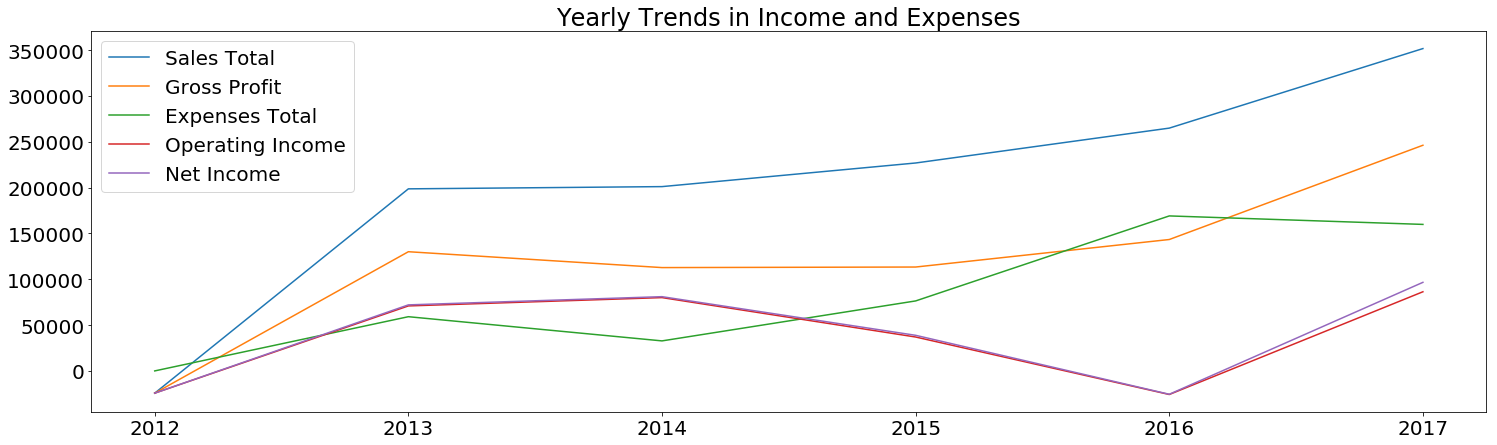

This Graph highlights the overall trend in income, which shows the progress of the business throughout the years.
I notice that expenses increased faster than sales, which led to a decrease in income in 2016.


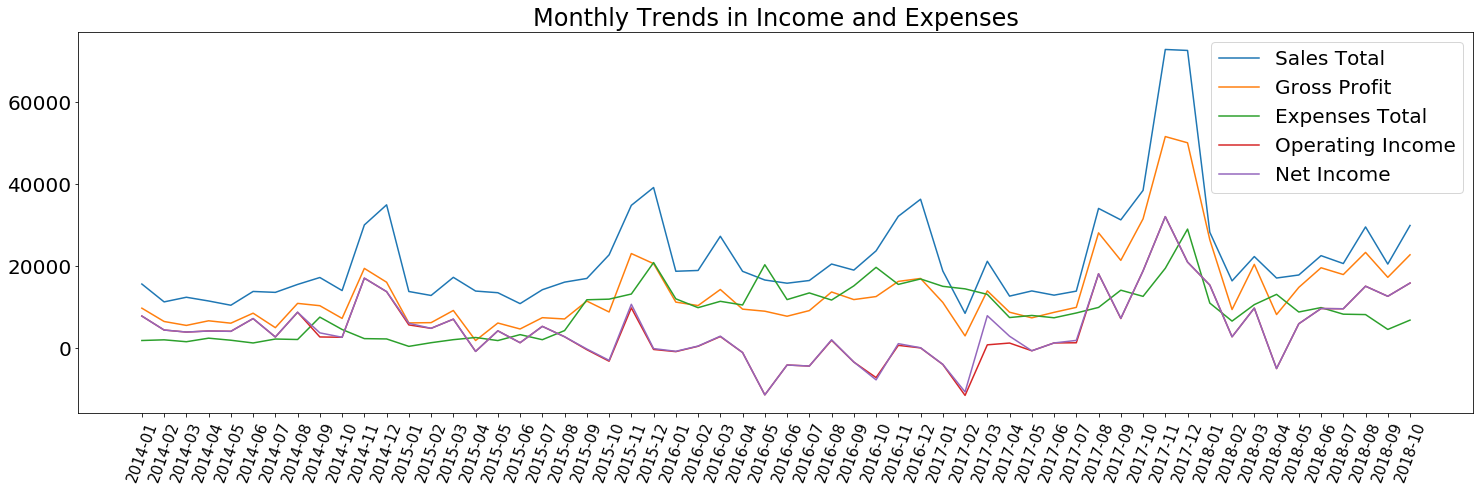

This graph shows the same information, but separated by month. It's interesting to see that most of their yearly sales and 
income peak at the end of the year, which was expected.


In [3]:
plt.rcParams["figure.figsize"] = [25, 7]
plt.rc('font',size=20)
plt.plot(income_yearly["Sales Total"], label = "Sales Total")
plt.plot(income_yearly["Gross Profit"], label = "Gross Profit")
plt.plot(income_yearly["Expenses Total"], label = "Expenses Total")
plt.plot(income_yearly["Operating Income"], label = "Operating Income")
plt.plot(income_yearly["Net Income"], label = "Net Income")
plt.legend()
plt.title("Yearly Trends in Income and Expenses")
plt.show()
print("This Graph highlights the overall trend in income, which shows the progress of the business throughout the years.")
print("I notice that expenses increased faster than sales, which led to a decrease in income in 2016.")

plt.plot(income_monthly["Sales Total"], label = "Sales Total")
plt.plot(income_monthly["Gross Profit"], label = "Gross Profit")
plt.plot(income_monthly["Expenses Total"], label = "Expenses Total")
plt.plot(income_monthly["Operating Income"], label = "Operating Income")
plt.plot(income_monthly["Net Income"], label = "Net Income")
plt.xticks(rotation=70, fontsize = 15)
plt.legend()
plt.title("Monthly Trends in Income and Expenses")
plt.show()
print("This graph shows the same information, but separated by month. It's interesting to see that most of their yearly sales and \nincome peak at the end of the year, which was expected.")

## Year to Year Comparisons
Using their sales data, we can compare each year to see overall growth.

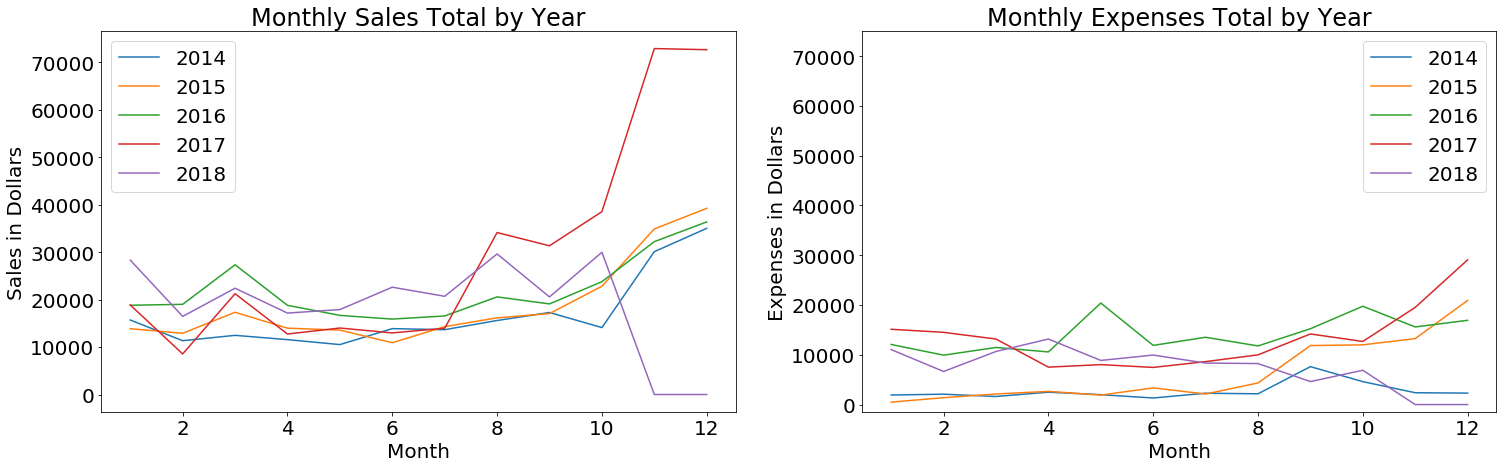

In [4]:
index = [i for i in range(1,13)]
columns = [i for i in range(2014,2019)]

sales_monthly = pd.DataFrame(index=index, columns = columns)
sales_monthly[2014] = [x for x in income_monthly["Sales Total"][:12].values]
sales_monthly[2015] = [x for x in income_monthly["Sales Total"][12:24].values]
sales_monthly[2016] = [x for x in income_monthly["Sales Total"][24:36].values]
sales_monthly[2017] = [x for x in income_monthly["Sales Total"][36:48].values]
sales2018 = list(x for x in income_monthly["Sales Total"][48:].values)
sales2018.append(0)
sales2018.append(0)
sales_monthly[2018] = sales2018
plt.subplot(121)
plt.plot(sales_monthly)
plt.title("Monthly Sales Total by Year")
plt.xlabel("Month")
plt.ylabel("Sales in Dollars")
plt.legend(columns)
#plt.show()

expenses_monthly = pd.DataFrame(index=index, columns = columns)
expenses_monthly[2014] = [x for x in income_monthly["Expenses Total"][:12].values]
expenses_monthly[2015] = [x for x in income_monthly["Expenses Total"][12:24].values]
expenses_monthly[2016] = [x for x in income_monthly["Expenses Total"][24:36].values]
expenses_monthly[2017] = [x for x in income_monthly["Expenses Total"][36:48].values]
expenses2018 = list(x for x in income_monthly["Expenses Total"][48:].values)
expenses2018.append(0)
expenses2018.append(0)
expenses_monthly[2018] = expenses2018
plt.subplot(122)
plt.plot(expenses_monthly)
plt.title("Monthly Expenses Total by Year")
plt.xlabel("Month")
plt.ylabel("Expenses in Dollars")
plt.ylim(top=75000)
plt.legend(columns)
plt.show()

These plots compare the Sales and Expenses by month from year to year. I was curious to see if there was an overall 
increase in sales or expenses.
It seems that overall their sales have remained more constant than I expected.

Note that 2018 November and December values are unknown at this time, thus their values are 0 in these graphs.
Once December ends, I'll reload the data and have complete graphs.

## Sales Visualizations
Using the data from ShipStation, we can visualize the number, location, and productivity of sales.

### Sales Locations

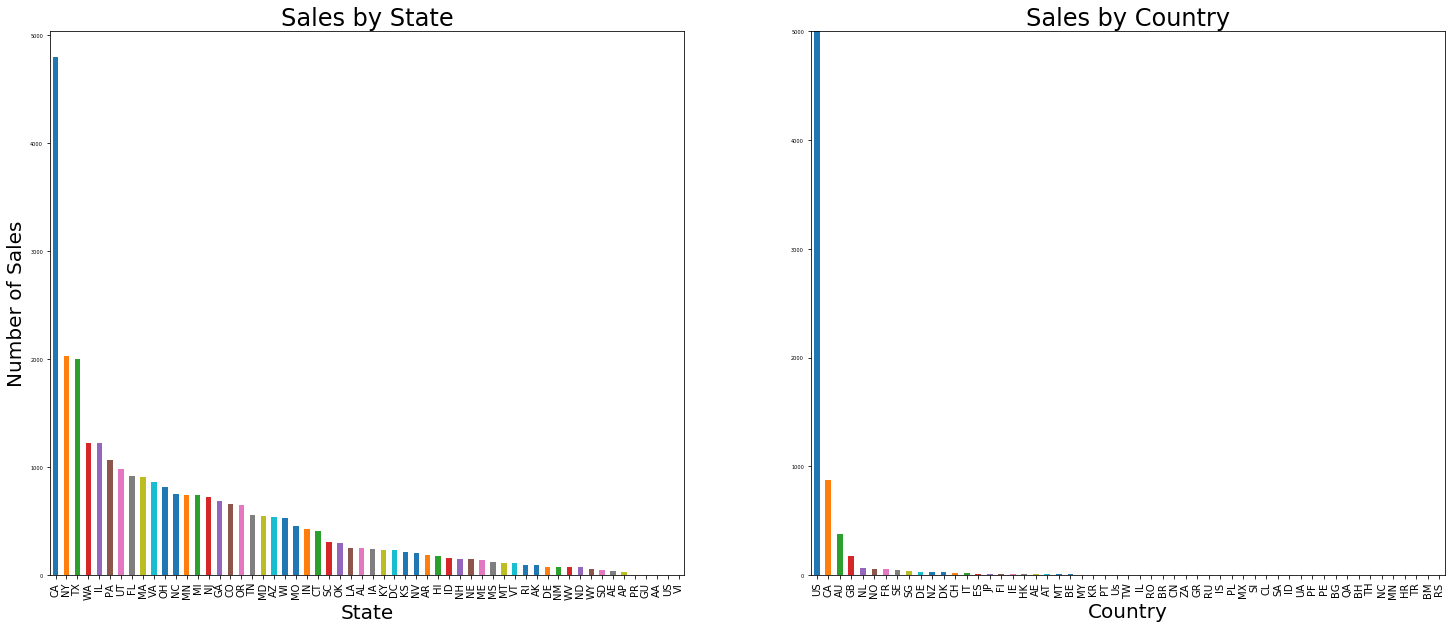

In [5]:
shipped["Order Date"] = pd.to_datetime(shipped["Order Date"])
shipped_items["Ship Date"] = pd.to_datetime(shipped_items["Ship Date"])
plt.rcParams["figure.figsize"] = [25, 10]
plt.rc("font",size=20)
plt.subplot(121)
state_counts = shipped.groupby("Ship Country").get_group("US")["Ship State"].value_counts()
state_counts.plot(kind = "bar", fontsize = 5)
plt.title("Sales by State")
plt.xlabel("State")
plt.ylabel("Number of Sales")
plt.xticks(size=10)
plt.subplot(122)
shipped["Ship Country"].value_counts().plot(kind = "bar", fontsize = 5)
plt.title("Sales by Country")
plt.xlabel("Country")
plt.xticks(size=10)
plt.ylim(top=5000)
plt.show()

Note: In Sales by Country, the US is cut off in order to see the others, it's count is nearing 30,000.

These graphs help to see where are the sales are taking place in the US and outside.
Also interesting to see that no country outside the US buys as much as a many single states.
Every Country or State/Territory labeled had at least one sale.

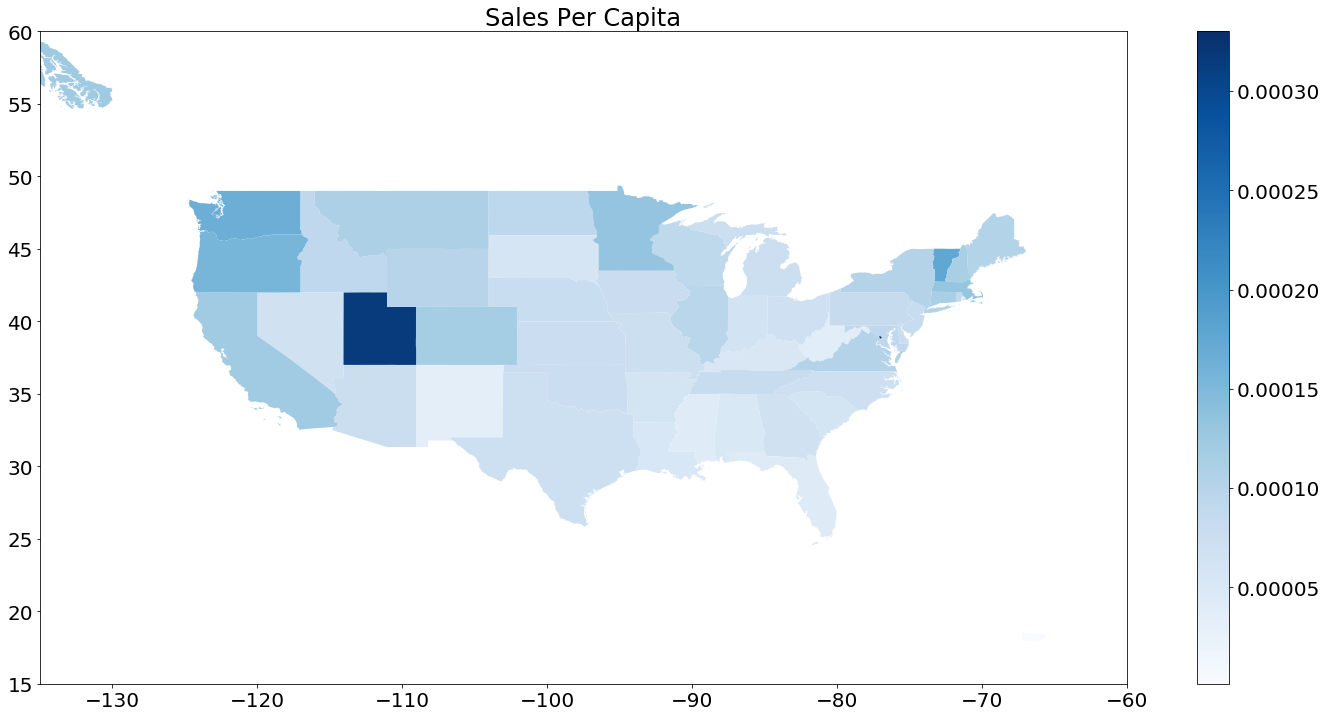

In [6]:
usa = read_maps()
not_states = []
for state in pd.DataFrame(state_counts).index:
    if(state in usa["STUSPS"].values):
        pass
    else:
        not_states.append(state)
state_counts = pd.DataFrame(state_counts).drop(not_states)
not_states = []
for state in usa["STUSPS"]:
    if(state in state_counts.index):
        pass
    else:
        not_states.append(state)
usa = usa.set_index("STUSPS")
usa = usa.drop(not_states)
usa = usa.drop(["VI","GU"])
usa["Ship Count"] = state_counts
usa["Sales Per Capita"] = usa["Ship Count"]/usa["Population"]
plt.rcParams["figure.figsize"] = [25, 12]
usa.plot(column="Sales Per Capita", cmap="Blues",legend = True)
plt.title("Sales Per Capita")
plt.xlim(left=-135,right=-60)
plt.ylim(bottom=15, top=60)
plt.show()

The darker the blue, the more sales per person by state.
This is based on the 2017 census estimate.

Tracking average sale price and number of sales across the years for each of the states they've moved to while owning the 
business.


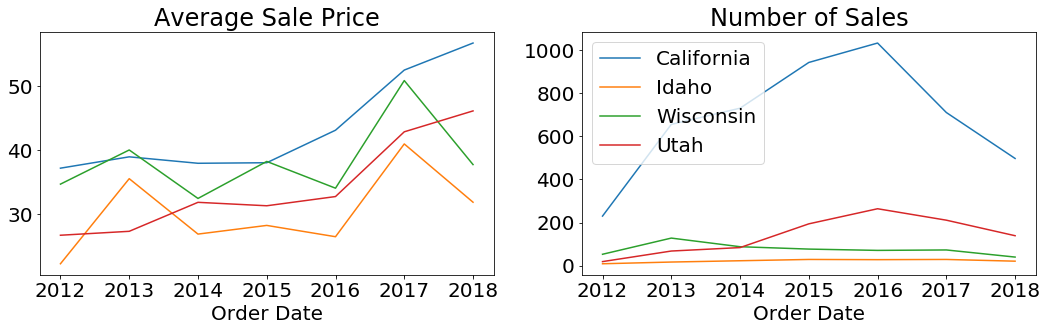

In [7]:
plt.rcParams["figure.figsize"] = [15, 5]
cali = shipped.groupby("Ship State").get_group("CA")
cali = cali.set_index("Order Date")
ax1 = plt.subplot(121, title="Average Sale Price")
cali["Amount Paid"].resample('Y').mean().plot(ax = ax1, label = 'California')
ax2 = plt.subplot(122, title="Number of Sales")
cali["Amount Paid"].resample('Y').count().plot(ax = ax2, label = 'California')

ida = shipped.groupby("Ship State").get_group("ID")
ida = ida.set_index("Order Date")
ida["Amount Paid"].resample('Y').mean().plot(ax=ax1, label = "Idaho")
ida["Amount Paid"].resample('Y').count().plot(ax = ax2,label = "Idaho")

wisc = shipped.groupby("Ship State").get_group("WI")
wisc = wisc.set_index("Order Date")
wisc["Amount Paid"].resample('Y').mean().plot(ax=ax1, label = "Wisconsin")
wisc["Amount Paid"].resample('Y').count().plot(ax=ax2,label="Wisconsin")

utah = shipped.groupby("Ship State").get_group("UT")
utah = utah.set_index("Order Date")
utah["Amount Paid"].resample('Y').mean().plot(ax=ax1, label="Utah")
utah["Amount Paid"].resample('Y').count().plot(ax=ax2,label="Utah")
print("Tracking average sale price and number of sales across the years for each of the states they've moved to while owning the \nbusiness.")
plt.legend()
plt.tight_layout()
plt.show()

Tracking average sale price and number of sales across the years for each of the states they've moved to while owning the 
business.

Years they moved:

2008-California - - -
2009-Idaho - - -
2010-Utah County - - -
2011-Wisconsin - - -
2013-Southern Utah - - -
2014-Northern Utah - - -
2016-Utah County

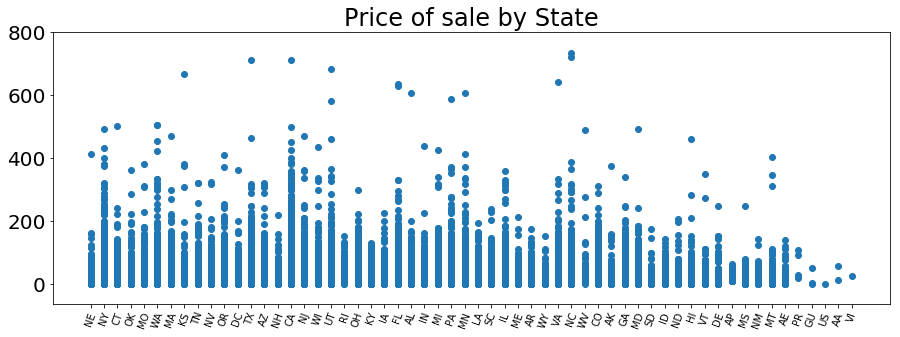

In [8]:
shipped_us = shipped.groupby("Ship Country").get_group("US")
plt.scatter(x=shipped_us["Ship State"], y=shipped_us["Amount Paid"])
plt.xticks(rotation=70, fontsize = 10)
plt.title("Price of sale by State")
plt.ylim(top=800)
plt.show()

In graph above, the prices shown are cut off at $800 because the few outliers that were above that value are wholesale, as opposed to retail, and the datasets I have don't include all of the wholesale sales.

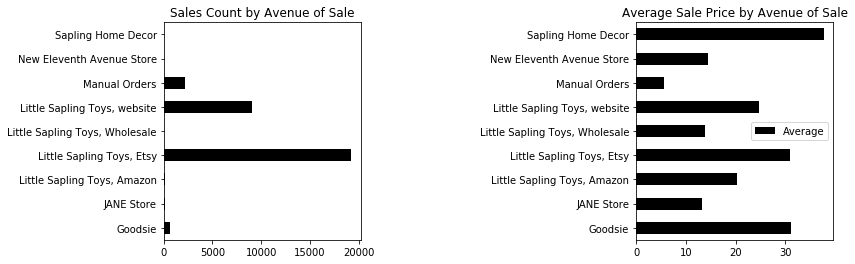

In [9]:
plt.rcParams["figure.figsize"] = [12, 4]
plt.rc('font',size=10)
store_names = list(shipped.groupby("Store Name").groups)

average_per_store = pd.DataFrame(index = store_names, columns = ["Average"])
averages = []

for store in store_names:
    averages.append(shipped.groupby("Store Name").get_group(store).mean()["Amount Paid"] / shipped.groupby("Store Name").get_group(store).mean()["Qty Shipped"])
average_per_store["Average"] = averages

ax1 = plt.subplot(131)
ax2 = plt.subplot(133)
shipped["Store Name"].value_counts().sort_index().plot(ax = ax1,kind="barh",color="k", title="Sales Count by Avenue of Sale")

average_per_store.plot(ax=ax2,kind = "barh", color='k', title="Average Sale Price by Avenue of Sale")
plt.show()

Little Sapling Toys has expanded from selling only on Etsy to selling on many platforms. Sapling Home Decor was a separate Etsy account that only lasted a few months before they decided to keep it all under one company. Manual Orders include returns, wholesale, trades, and customer service. The Etsy shop was their only selling platform for many years and still remains their highest revenue of sale. Little Sapling Toys only has a limited number of toys available on Amazon and has not had that platform for very long.

## By Product
A note about this section is that many of their toys have been discontinued, renamed, or created during the course of the years. Due to this, some of this data exploration may be inaccurate.

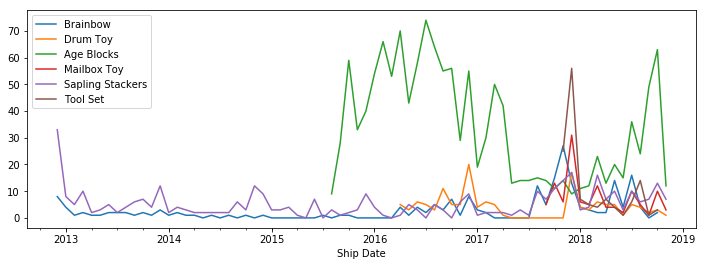

In [10]:
rainbow = shipped_items.groupby("Item Description").get_group("Stacking Rainbow Toy")
rainbow = rainbow.set_index("Ship Date")
drum = shipped_items.groupby("Item Description").get_group("Drum Wood Toy")
drum = drum.set_index("Ship Date")
age = shipped_items.groupby("Item Description").get_group("Age Blocks")
age = age.set_index("Ship Date")
mail = shipped_items.groupby("Item Description").get_group("Mailbox Toy")
mail = mail.set_index("Ship Date")
stacker = shipped_items.groupby("Item Description").get_group("Sapling Stacker Toy")
stacker = stacker.set_index("Ship Date")
toolbox = shipped_items.groupby("Item Description").get_group("Wooden Tool Set Toy")
toolbox = toolbox.set_index("Ship Date")
ax = rainbow["Item Description"].resample('M').count().plot(label = "Brainbow")
drum["Item Description"].resample('M').count().plot(ax=ax,label="Drum Toy")
age["Item Description"].resample('M').count().plot(ax=ax,label="Age Blocks")
mail["Item Description"].resample('M').count().plot(ax=ax,label="Mailbox Toy")
stacker["Item Description"].resample('M').count().plot(ax=ax,label="Sapling Stackers")
toolbox["Item Description"].resample('M').count().plot(ax=ax,label="Tool Set")
plt.legend()
plt.show()

The toys in this graph are some that are amid the top toys sold or more difficult to manufacture. Being able to predict these 
toy sales would increase production efficiency.
Many of these toys are newer and some were included in some of the first toys LST sold.
Due to incomplete consolidating of toy descriptions, this graph may not be accurate.

I feel that there is a lot of potential in this section in predicting toy manufacturing so they don't have to rely on "made to order" toys. The problem is there is a lot of cleaning in this section as the names/descriptions of these toys have changed so much. I want to try using regular expressions as we learned in class to clean these into more concise columns. Unfortunately I don't have the time to do that at this time, but I do think I will continue to work on this project, especially in this area to see what else I can learn.

# Conclusions
Many of the results that I found while exploring the data for Little Sapling Toys were about where they've been and trying to find patterns in where and what they sell. The deeper I got into the data, the more I realized how messy it was, as a result, I was unable to answer many of the questions I started out with.

I feel that the most promising data in this set is the shipping information as it has record of what items were sold. If I can clean this data thouroughly, I will be able to supply answers in reference to sales predictions, which would help them better manage their inventory. As they are selling the business and have no need for this data, this would provide an opportunity for me to practice that to potentially market that to other small businesses.

I was also shocked with the lack of progression in the business in reference to sales and income. I had expected the first few graphs to have a stronger upward trend and the year overlays to increase, but they didn't. I learned a lot about the importance of expenses when it comes to income as I could see their sales increase, but their total income never did.

As far as keeping data, I learned how much variation there is in every dataset. Even with my cleanly compiled data, due to the history of the business, there were a lot of problems that were very difficult to overcome and some data that will be lost due to the vast amount of changes to toy names and ways of documenting. The only way to have exceptionally clean data would be to establish, at the beginning, a uniform way to track things and then to never change, but with the way a business, and the world, works, things are constantly in flux, therefore we will never have uniform data to work with.

# Appendix
#### Expense Distribution
After experimenting with the general ledger file and exploring its information, I've discovered that there is too much discrepency for the data to be reliable for the type of analysis I'm doing. Many of the names and categories change ever couple of years and I cannot track down what belongs with what without extensive research into it, which would take more time than I currently have.

As a result, I will not be able to analyze the expenses of Little Sapling Toys with what I've been given.

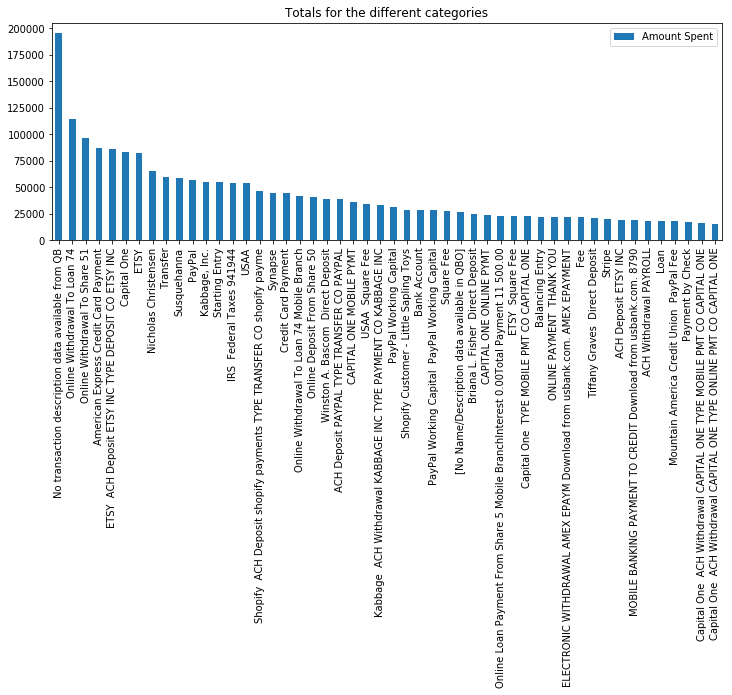

In [11]:
general_ledger["amount"] = pd.to_numeric(general_ledger["amount"])
general_ledger["balance"] = pd.to_numeric(general_ledger["balance"])
general_category_group = general_ledger.groupby("name")
general_categories = list(general_category_group.groups)

general_totals = []
distribution = pd.DataFrame(index = general_categories, columns = ["Amount Spent"])

for category in general_categories:
    total = abs(general_category_group.get_group(category)[general_category_group.get_group(category)["amount"] < 0].sum()["amount"]) 
    if(total>0):
        general_totals.append(total)
    else:
        general_totals.append(0)
distribution["Amount Spent"] = general_totals

distribution.sort_values(by="Amount Spent",ascending=False)[:50].plot(kind = "bar")
plt.title("Totals for the different categories")
plt.plot()
plt.show()

##### Sales_Summary
The sales_summary file has a record of all sales with very little information attached to each. More information was useful in the shipped files
##### TrialBalance
The trialbalance file has debit and credit records with similar problems as the general_ledger file